We are working on text mining try to extract words from a page and visualize them in some sort of way. We will be using the wikipidea page on Data Science.

In [1]:
url = 'https://en.wikipedia.org/wiki/Data_science'

Step 1 : Getting the Data.
We will be using a library called request so as to get the data.

In [2]:
import requests
text = requests.get(url).content.decode('utf')
print(text[:1000]) # Print the first 1000 characters of the page content

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Data science - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featur

Step 2: Transforming the Data
The next step is to convert the data into the form suitable for processing. In this case, the downloaded HTML source code from the page, and we need to convert it into plain text.Like discard all the HTML elements and remain with only the information important to use.

There are many ways this can be done. We will use the simplest built-in HTMLParser object from Python. We need to subclass the HTMLParser class and define the code that will collect all text inside HTML tags, except <script> and <style> tags.

In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000]) 

 Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Special pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations 2 Etymology Toggle Etymology subsection 2.1 Early usage 2.2 Modern usage 3 Data science and data analysis 4 Cloud computing for data science 5 Ethical consideration in data science 6 See also 7 References Toggle the table of contents Data science 50 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Ido Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahasa Melayu မြန်မာဘာသာ Nederlands 日本語 N

Step 3 : Getting insights from the data
We want to get like the the meaningful words from the the above data and we will use a tool called RAKE but we will need to install it first.

In [4]:
import sys
!{sys.executable} -m pip install nlp_rake


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data scientist', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('statistical learning', 4.0),
 ('big data', 4.0),
 ('data science', 3.8909090909090907),
 ('computer science', 3.8909090909090907),
 ('^ davenport', 3.8),
 ('information science', 3.790909090909091),
 ('cloud computing', 3.75),
 ('data analysis', 3.7),
 ('science', 1.8909090909090909),
 ('analysis', 1.7),
 ('statistics', 1.2857142857142858),
 ('processing', 1.25),
 ('thomas', 1.2),
 ('mathematics', 1.0),
 ('education', 1.0),
 ('communications', 1.0),
 ('chikio', 1.0)]

Step 4: Visualizing the Result
People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use matplotlib library in Python to plot simple distribution of the keywords with their relevance:

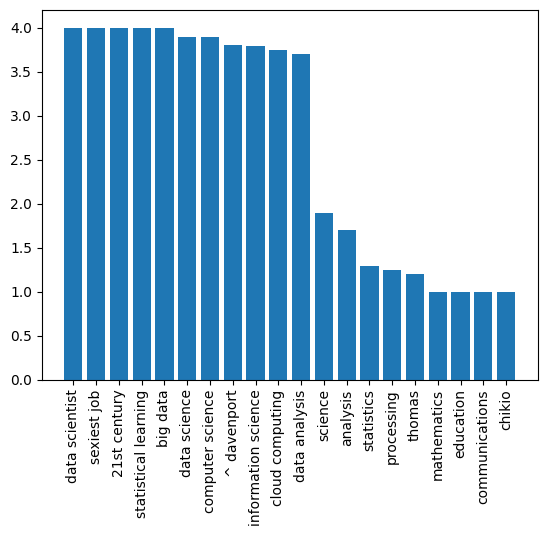

In [6]:
import matplotlib.pyplot as plt

def plot (pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)), k, rotation = 'vertical')
    plt.show()
plot(res)

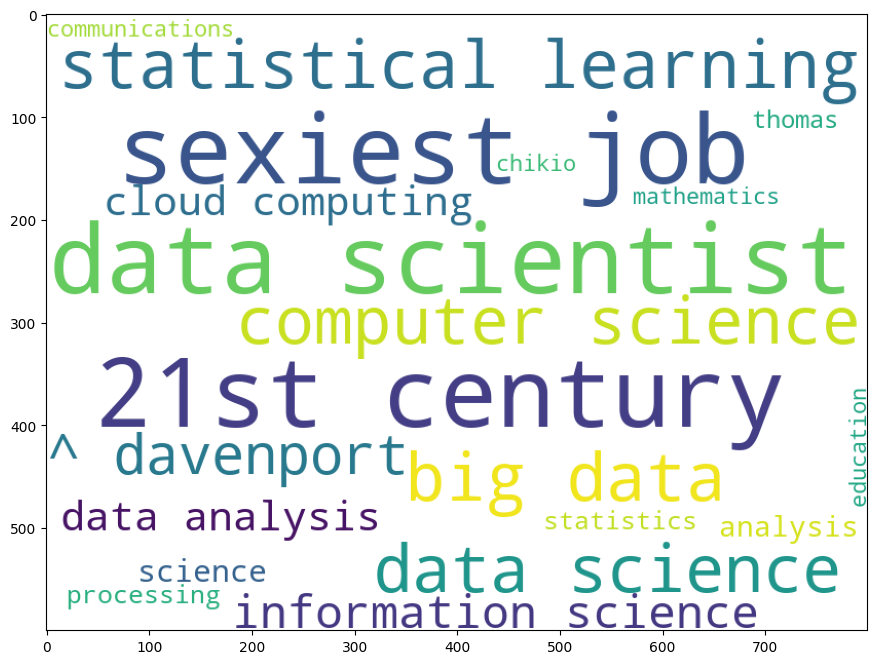

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,8))
plt.imshow(wc.generate_from_frequencies({k:v for k,v in res}))

we can also pass the original text and see what the result will be.

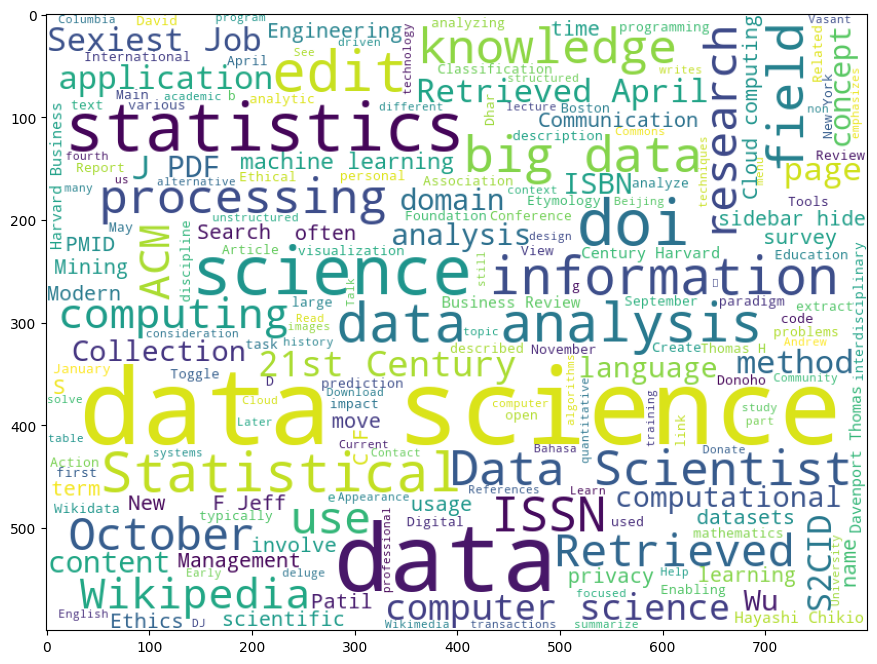

In [8]:
plt.figure(figsize=(15,8))
plt.imshow(wc.generate(text))